In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st
import pandas as pd

In [115]:
# Parameters
# drift coefficent
mu = 0.1787
# number of steps
n = 252
# time in years
T = 1
# number of sims
M = 100000
# initial stock price
S0 = np.array([475.99])
# volatility
sigma = 0.2961

In [116]:
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

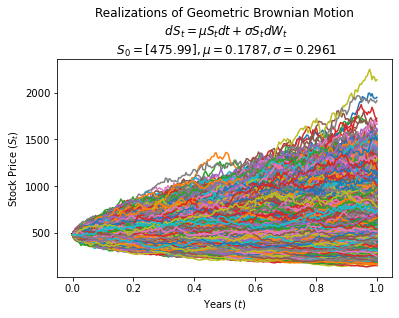

In [117]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

In [118]:
data =St[252]

In [19]:
print(time)

[0.         0.00396825 0.00793651 0.01190476 0.01587302 0.01984127
 0.02380952 0.02777778 0.03174603 0.03571429 0.03968254 0.04365079
 0.04761905 0.0515873  0.05555556 0.05952381 0.06349206 0.06746032
 0.07142857 0.07539683 0.07936508 0.08333333 0.08730159 0.09126984
 0.0952381  0.09920635 0.1031746  0.10714286 0.11111111 0.11507937
 0.11904762 0.12301587 0.12698413 0.13095238 0.13492063 0.13888889
 0.14285714 0.1468254  0.15079365 0.1547619  0.15873016 0.16269841
 0.16666667 0.17063492 0.17460317 0.17857143 0.18253968 0.18650794
 0.19047619 0.19444444 0.1984127  0.20238095 0.20634921 0.21031746
 0.21428571 0.21825397 0.22222222 0.22619048 0.23015873 0.23412698
 0.23809524 0.24206349 0.24603175 0.25       0.25396825 0.25793651
 0.26190476 0.26587302 0.26984127 0.27380952 0.27777778 0.28174603
 0.28571429 0.28968254 0.29365079 0.29761905 0.3015873  0.30555556
 0.30952381 0.31349206 0.31746032 0.32142857 0.32539683 0.32936508
 0.33333333 0.33730159 0.34126984 0.3452381  0.34920635 0.3531

In [30]:
print(St[252])

[286.41336416 426.45584559 590.23260132 ... 331.48851827 382.44490126
 456.01896439]


In [10]:
St[252]

array([ 84.20847555, 141.34505041,  89.8331154 , ...,  76.69993047,
       102.33441514, 126.54836332])

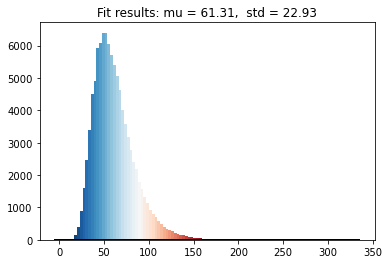

In [30]:

# Generate some data for this demonstration.
data = St[252]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
cm = plt.cm.RdBu_r
plt.hist(data, bins=500, density=True, alpha=0.6, color='r')

n, bins, patches = plt.hist(data, 100, color='blue')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/50)) # notice the i/25
 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 85)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

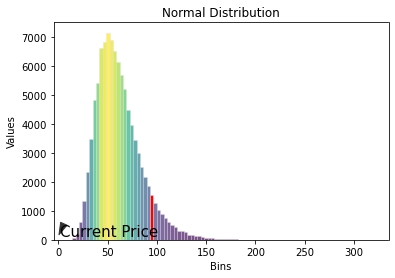

In [31]:
n, bins, patches = plt.hist(data, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
patches[24].set_fc('red') # Set color
patches[24].set_alpha(1) # Set opacity
# Add annotation
plt.annotate('Current Price', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
# Add title and labels with custom font sizes
plt.title('Normal Distribution', fontsize=12)
plt.xlabel('Bins', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.show()

NameError: name 'std' is not defined

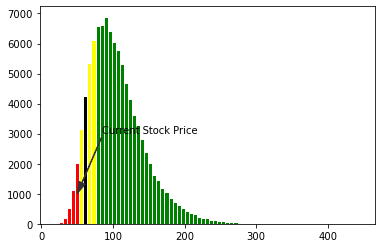

In [24]:
data = St[252]
fig, ax = plt.subplots()

N, bins, patches = ax.hist(data,bins=75, edgecolor='white', linewidth=1)

for i in range(0,6):
    patches[i].set_facecolor('red')
for i in range(6,10):    
    patches[i].set_facecolor('yellow')
for i in range(7,8):    
    patches[i].set_facecolor('black')
for i in range(10, len(patches)):
    patches[i].set_facecolor('green')
    
plt.annotate('Current Stock Price', xy=(50, 1000), xytext=(85, 3000), fontsize=10, arrowprops={'width':0.5,'headwidth':7,'color':'#333333'})
    
    
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Geometrical Brownian Motion Distribution"
plt.title(title)


plt.show()

In [119]:
sorted_data= np.sort(data)

In [122]:
sum(sorted_data<475.99)/M


0.32419

In [121]:
sum(sorted_data>475.99)/M

0.67581

In [64]:
print(patches[10])

Rectangle(xy=(51.8316, 0), width=4.11863, height=8202, angle=0)


In [36]:
np.mean(sorted_data)

61.31073371007877

In [78]:
new_array= np.array_split(sorted_data,75)

In [89]:
new_array[50]

array([36.03622445, 36.03628371, 36.03679056, ..., 36.50652311,
       36.50678333, 36.50681245])

In [53]:
df.quantile(.2, axis = 0)

NameError: name 'df' is not defined

In [120]:
print(np.mean(sorted_data))
print("Q1 quantile of arr : ", np.quantile(sorted_data, .25))
print("Q2 quantile of arr : ", np.quantile(sorted_data, .50))
print("Q3 quantile of arr : ", np.quantile(sorted_data, .75))

569.1099053390127
Q1 quantile of arr :  445.71572868155295
Q2 quantile of arr :  544.2624321227453
Q3 quantile of arr :  664.5164562858008
